## Practice Exercise 1

In [ ]:
##1. Blood group of 200 people is provided as follows
##Blood  Group People
##  A       50
##  B       65
##  O       70
##  AB      15
##If you pick a person from this set at random what is the probability that their blood type is O?
Answer::
        O -- > 70
        Total --> 200
        prob of 'O' blood type --> 70/200 -->0.35
  

In [ ]:
#2. On tossing a fair coin twice, we want to observe the number of heads. Define the sample 
#space, Random Variable (X), Rx and PMF Px.

coin tossed twice -- > {HH,HT,TH,TT}
sample space -->{HH,HT,TH,TT}
Random experiment/Random variable(X) --> To observe no.of heads on tossing a fair coin twice
Rx = {0,1,2}
x is the discrete random variable
Px(x=0) ==  {TT} -->1/4
Px(x=1) ==  {HT,TH} --> 2/4
Px(x=2) ==  {HH}--> 1/4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PMF\xa0of\xa0Heads\xa0in\xa0tossing\xa0a\xa0fair\xa0coin\xa0two\xa0times')

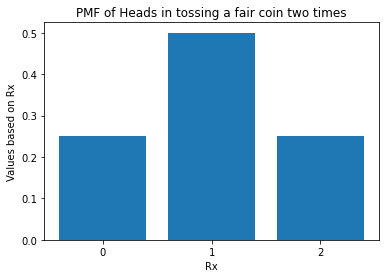

In [48]:
##3. Plot the above PMF as a histogram using Python’s matplotlib
pmf = {'0': 0.25,'1':0.5,'2':0.25}
plt.bar(pmf.keys(),pmf.values())
plt.xlabel("Rx")
plt.ylabel("Values based on Rx")
plt.title("PMF of Heads in tossing a fair coin two times")

In [5]:
#4. Consider the Mall_Customers dataset with the following description, visiting a mall:
#CustomerID: Customer id of the customer
#Gender: Gender (Male or Female)
#Age: Age of the customer
#Annual_Income: Annual Income of customers in K$ (eg 1 = 1000$)
#Spending Score: Spending score of the customer (how much the customer can spend)

mall = pd.read_csv("Mall_Customers.csv")

mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
mall["Spending Score (1-100)"].value_counts().sort_values()

18    1
68    1
99    1
85    1
23    1
     ..
35    5
73    6
46    6
55    7
42    8
Name: Spending Score (1-100), Length: 84, dtype: int64

Answer the following questions:
a) What features are suitable for PMF and for PDF. Justify.
b) Group the customers with high, medium, and low spending score. (You can choose 
the range for each category).
c) Is the percentage of male ‘High’ spenders more than female ‘High’ spenders.
d) Create a frequency table to find percentage of Low and High spenders.
e) You want to attract mall customers for the offers and buy more from you? What 
would you do.

#a) What features are suitable for PMF and for PDF. Justify.
PMF : Gender, 
PDF :Annual Income (k$),Spending Score (1-100)
    
    

In [8]:
mall["Spending Score (1-100)"].min()

1

In [9]:
### b) Group the customers with high, medium, and low spending score. (You can choose 
## the range for each category).

mall["SpendPower"] = pd.cut(x=mall["Spending Score (1-100)"], bins = [0,33,66,100],
                          labels = ["Low","medium","high"])
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),SpendPower
0,1,Male,19,15,39,medium
1,2,Male,21,15,81,high
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,high
4,5,Female,31,17,40,medium
...,...,...,...,...,...,...
195,196,Female,35,120,79,high
196,197,Female,45,126,28,Low
197,198,Male,32,126,74,high
198,199,Male,32,137,18,Low


In [10]:
##c) Is the percentage of male ‘High’ spenders more than female ‘High’ spenders.
high_spend = pd.crosstab(mall["Gender"],
                columns = mall["SpendPower"])
high_spend

SpendPower,Low,medium,high
Gender,,,
Female,25,54,33
Male,24,40,24


In [11]:
high_spend = pd.crosstab(index = [mall["Gender"], mall["SpendPower"]],
                columns ="counts")
high_spend

col_0              counts
Gender SpendPower        
Female Low             25
       medium          54
       high            33
Male   Low             24
       medium          40
       high            24

In [12]:
high_spend['counts'].sum()

200

In [13]:
mall['SpendPower'].shape

(200,)

In [14]:
high_spend.loc['Male','high']

col_0
counts    24
Name: (Male, high), dtype: int64

In [15]:
high_spend.loc['Female','high']

col_0
counts    33
Name: (Female, high), dtype: int64

In [16]:
male = (high_spend.loc['Male','high']/high_spend['counts'].sum()*100)
male



col_0
counts    12.0
Name: (Male, high), dtype: float64

In [17]:
female = (high_spend.loc['Female','high']/mall['SpendPower'].shape[0] * 100)
female

col_0
counts    16.5
Name: (Female, high), dtype: float64

Female spends more than male

In [ ]:
#d) Create a frequency table to find percentage of Low and High spenders.

Tot_low = high_spend["Low"].sum()
Tot_high = high_spend["high"].sum()
Tot_med = high_spend["medium"].sum() 

print(Tot_low)
print(Tot_high)
print(Tot_med)



In [ ]:
Total = Tot_low+Tot_high+Tot_med
Total


In [ ]:
high_perc = (Tot_high/Total*100)
high_perc

In [ ]:
low_perc = (Tot_low/Total*100)
low_perc

In [ ]:
mall['SpendPower'].value_counts()

In [ ]:
x=mall['SpendPower'].value_counts()/mall.shape[0]

x

In [ ]:
mall.shape[0]

In [ ]:
plt.bar(x.index,x.values)
plt.xlabel("Spending Power")
plt.ylabel("Frequency (Fx)")

In [ ]:
##e) You want to attract mall customers for the offers and buy more from you? What 
##would you do.
Medium

## Practice Exercise 2

In [ ]:
1. Suppose an individual plays a gambling game where it is possible to lose $1.00, break 
even, win $3.00, or win $10.00 each time she plays. The probability distribution for each 
outcome is provided by the following table:
Outcome    -$1.00  $0.00  $3.00  $5.00
Probability  0.30   0.40   0.20   0.10
How many $ can the player to expect to win or lose in this game?

In [20]:
(-1*0.30)+(0*0.40)+(3*0.20)+(5*0.10)

0.8

the player is expected to win 80 cents playing the game

In [ ]:
#2. A Random Variable X can take only two values, 4 and 5 such that P(4) = 0.32 and P(5) = 
#0.47. Determine the Variance of X.

In [ ]:
P(4) = 0.32 
P(5) = 0.47
##variance formula:: E[X^2]-(E[X])^2

In [22]:
mean = (4*0.32)+(5*0.47)
mean

3.63

In [ ]:
#Variance: ∑x2* P(x)
#Var(X) = ∑x2*P(x) − μ2
#Expected Value: μ = E(X) = ∑x * P(x)

In [23]:
variance = ((4*4)*0.32)+((5*5)*0.47) - (mean*mean)
variance

3.693100000000001

In [ ]:
3. Consider a project with the following information.
Project A:
    Amount                Probability
71000 (loss of 71000)       0.2

0 (no profit no loss)       0.65

143000 (gain of             0.15
143000)
                    
What is the expected RoI?

In [24]:
a = (-71000*0.2) + (0*0.65) + (143000*0.15)
a

7250.0

In [ ]:
4. Consider the following tables for infants born with SIRDS 
(* did not survive)
Calculate the E[Weight] for infants who survived and the ones who did not.

In [ ]:
## 5. Consider the Mall_Customers dataset with the following description, visiting a mall:
## CustomerID: Customer id of the customer
## Gender: Gender (Male or Female)
## Age: Age of the customer
## Annual_Income: Annual Income of customers in K$ (eg 1 = 1000$)
## Spending Score: Spending score of the customer (how much the customer can spend)
## Answer the following questions:
## a) Demonstrate the CDF of Spending Score.
## b) Plot the ECDF of Age and Annual Income. What are your interpretations.
## c) Compare the Spending Power of Customers with respect to their incomes.

In [25]:
mall


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),SpendPower
0,1,Male,19,15,39,medium
1,2,Male,21,15,81,high
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,high
4,5,Female,31,17,40,medium
...,...,...,...,...,...,...
195,196,Female,35,120,79,high
196,197,Female,45,126,28,Low
197,198,Male,32,126,74,high
198,199,Male,32,137,18,Low


In [26]:
## a) Demonstrate the CDF of Spending Score.
cdf_spend = mall["SpendPower"].value_counts(normalize = True)
cdf_spend

medium    0.470
high      0.285
Low       0.245
Name: SpendPower, dtype: float64

In [27]:
sort = cdf_spend.sort_values()
sort

Low       0.245
high      0.285
medium    0.470
Name: SpendPower, dtype: float64

In [28]:
cdf = sort.cumsum()
cdf

Low       0.245
high      0.530
medium    1.000
Name: SpendPower, dtype: float64

In [46]:
cdf.index

CategoricalIndex(['Low', 'high', 'medium'], categories=['Low', 'medium', 'high'], ordered=True, dtype='category')

In [49]:
cdf.values

array([0.245, 0.53 , 1.   ])

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='SpendPower', ylabel='Proportion'>

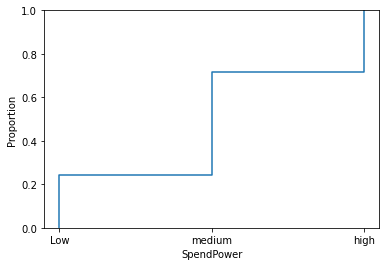

In [30]:
sns.ecdfplot(data = mall,x=mall["SpendPower"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Proportion'>

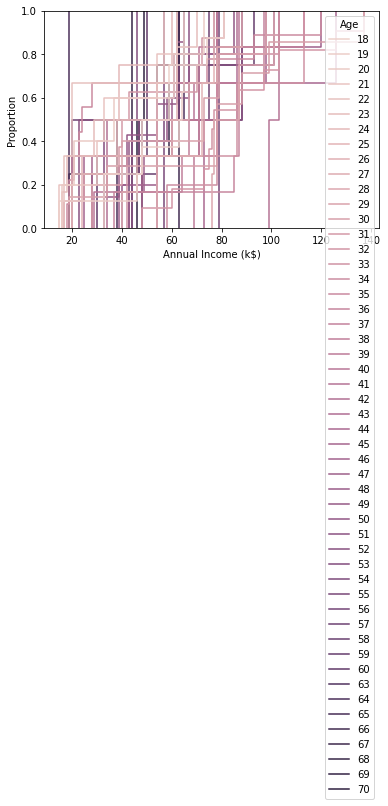

In [38]:
## b) Plot the ECDF of Age and Annual Income. What are your interpretations.
sns.ecdfplot(hue="Age", x = "Annual Income (k$)", data = mall)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Proportion'>

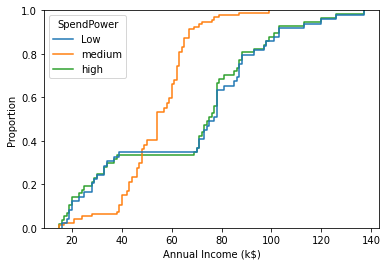

In [39]:
## c) Compare the Spending Power of Customers with respect to their incomes.
sns.ecdfplot(hue="SpendPower", x = "Annual Income (k$)", data = mall)